In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold

## a) load/merge data and visualize logerror

In [2]:
# load data into DataFrames
train = pd.read_csv('train.csv')
prop = pd.read_csv('properties.csv')
train_prop = pd.merge(train,prop, on='id')

In [3]:
train_prop_np = train_prop.to_numpy()
train_prop_np[0][1]

-0.1684

In [4]:
# eliminate outliers
train_prop_np = train_prop.to_numpy()
samples,catagories = train_prop_np.shape
listall = []
for logerror in range(samples):
    listall.append(train_prop_np[logerror][1])
print(len(listall))  
alllog = np.array(listall)
lowerbound = np.percentile(alllog,q=1)
upperbound = np.percentile(alllog,q=99)

listclean = []
#samples,catagories=trainnp.shape
for logerror in range(samples):
    if train_prop_np[logerror][1] > upperbound:
        print("Outlier too high")
        listclean.append(upperbound)
    elif train_prop_np[logerror][1] < lowerbound:
        print("Outlier too low")
        listclean.append(lowerbound)
    else:
        listclean.append(train_prop_np[logerror][1])
print(len(listclean))

31725
Outlier too low
Outlier too low
Outlier too high
Outlier too low
Outlier too high
Outlier too low
Outlier too high
Outlier too high
Outlier too low
Outlier too high
Outlier too low
Outlier too low
Outlier too low
Outlier too high
Outlier too low
Outlier too high
Outlier too high
Outlier too low
Outlier too high
Outlier too high
Outlier too high
Outlier too high
Outlier too high
Outlier too high
Outlier too low
Outlier too low
Outlier too low
Outlier too high
Outlier too low
Outlier too high
Outlier too high
Outlier too high
Outlier too high
Outlier too high
Outlier too low
Outlier too high
Outlier too high
Outlier too high
Outlier too high
Outlier too high
Outlier too high
Outlier too high
Outlier too high
Outlier too high
Outlier too low
Outlier too low
Outlier too low
Outlier too high
Outlier too high
Outlier too low
Outlier too low
Outlier too low
Outlier too high
Outlier too low
Outlier too high
Outlier too high
Outlier too high
Outlier too high
Outlier too low
Outlier too hi

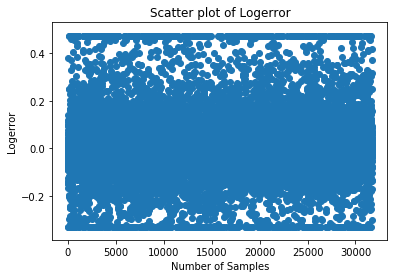

In [5]:
# scatter of logerr
plt.scatter(np.arange(len(listclean)),listclean)
plt.xlabel('Number of Samples')
plt.ylabel('Logerror')
plt.title('Scatter plot of Logerror')
plt.show()

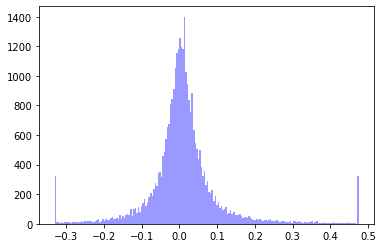

In [6]:
# histogram of logerr
# histogram of logerr
x = listclean
#What to do with outliers?
num_bins = 100
plt.hist(x,bins="auto",facecolor="blue",alpha=0.4)
plt.show()

## b) data cleaning

In [7]:
# build new data frame
NANData = train_prop.isna().sum()
MissingInfo = {'column_name':train_prop.columns,'missing_count':NANData}
Fixed = pd.DataFrame(data=MissingInfo)
Fixed['missing_ratio'] =  (train_prop.isna().sum())/(len(train_prop))

In [8]:
# fill missing data
CompleteData = train_prop.fillna(train_prop.mean())
print(CompleteData.isna().sum())
#CompleteData.head()

id                                  0
logerror                            0
transactiondate                     0
airconditioningtypeid               0
architecturalstyletypeid            0
basementsqft                        0
bathroomcnt                         0
bedroomcnt                          0
buildingclasstypeid                 0
buildingqualitytypeid               0
calculatedbathnbr                   0
decktypeid                          0
finishedfloor1squarefeet            0
calculatedfinishedsquarefeet        0
finishedsquarefeet12                0
finishedsquarefeet13                0
finishedsquarefeet15                0
finishedsquarefeet50                0
finishedsquarefeet6                 0
fips                                0
fireplacecnt                        0
fullbathcnt                         0
garagecarcnt                        0
garagetotalsqft                     0
hashottuborspa                      0
heatingorsystemtypeid               0
latitude    

In [9]:
print(train_prop["propertyzoningdesc"])
print(train_prop["taxdelinquencyflag"])
#taxdelinquencyflag and propertyzoningdesc are strings and 
#do not have averages which is why NaN remain

0               NaN
1               NaN
2             LARE9
3              LAR1
4             LBR4R
            ...    
31720        NOR1YY
31721    LRRPD75002
31722      LRR7000*
31723          LAR1
31724         CARS*
Name: propertyzoningdesc, Length: 31725, dtype: object
0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
31720    NaN
31721      Y
31722    NaN
31723    NaN
31724    NaN
Name: taxdelinquencyflag, Length: 31725, dtype: object


## c) univariate analysis

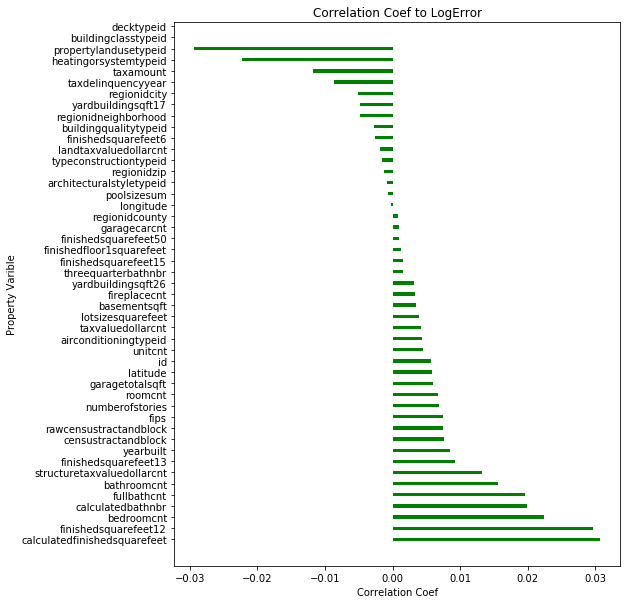

In [10]:
# make bar chart
DataCor = CompleteData.corrwith(CompleteData['logerror'])
SortedData = DataCor.sort_values(ascending=False)
SortedData_NoLog = SortedData.drop(['logerror'])
plt.figure(figsize=(8, 10))
plt.title('Correlation Coef to LogError')
plt.barh(SortedData_NoLog.index,SortedData_NoLog.values,0.3, color="green")
plt.xlabel('Correlation Coef')
plt.ylabel('Property Varible')
plt.show()

In [11]:
print(CompleteData["decktypeid"])
print(CompleteData["buildingclasstypeid"])

0        66.0
1        66.0
2        66.0
3        66.0
4        66.0
         ... 
31720    66.0
31721    66.0
31722    66.0
31723    66.0
31724    66.0
Name: decktypeid, Length: 31725, dtype: float64
0        4.0
1        4.0
2        4.0
3        4.0
4        4.0
        ... 
31720    4.0
31721    4.0
31722    4.0
31723    4.0
31724    4.0
Name: buildingclasstypeid, Length: 31725, dtype: float64


In [12]:
# explain reason
#The varibles at the top have no Correlation Value because all values
#in the catagories decktypeid and buildingclasstypeid are the same
#therefore there is no varience to calculate the Correlation Coef

## d) non-linear regression model

In [13]:
# drop categorical features 
# ("hashottuborspa", "propertycountylandusecode", "propertyzoningdesc", "fireplaceflag", "taxdelinquencyflag") 
# drop "id" and "transactiondate"
RandForestData = CompleteData.drop(["hashottuborspa", "propertycountylandusecode", "propertyzoningdesc", "fireplaceflag", "taxdelinquencyflag","id","transactiondate"],axis=1)

In [14]:
# split and train
from sklearn.model_selection import *
from sklearn.ensemble import *
x = RandForestData.drop(["logerror"],axis=1)
y = RandForestData["logerror"]
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.7)
Model = RandomForestRegressor().fit(X_train, y_train)

C:\Users\rdesa\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
C:\Users\rdesa\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:167: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True,

C:\Users\rdesa\Anaconda3\lib\site-packages\sklearn\ensemble\base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)


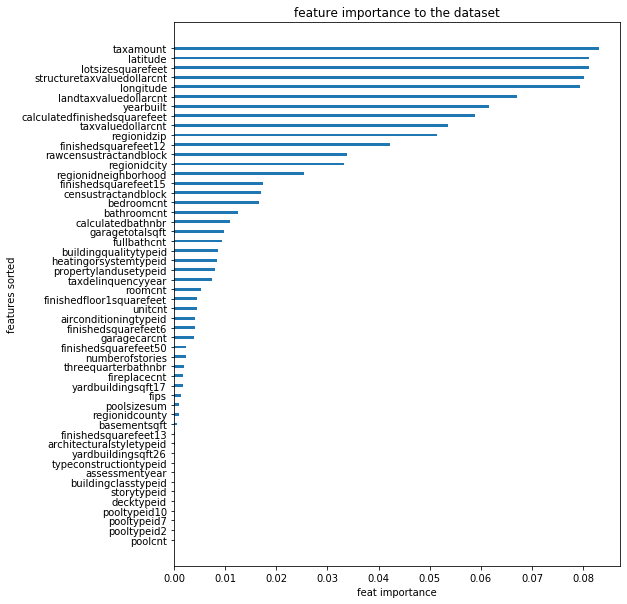

MSE = 0.02995938558317681


In [15]:
# report importances and mse
ImportData = Model.feature_importances_
y_predict = Model.predict(X_test)
ImportData = pd.DataFrame(data={'feat': x.columns,'import' : ImportData})
ImportDataSorted = ImportData.sort_values(by=['import'])
plt.figure(figsize=(8, 10))
plt.barh(ImportDataSorted['feat'],ImportDataSorted['import'],0.3)
plt.title('feature importance to the dataset')
plt.xlabel('feat importance')
plt.ylabel('features sorted')
plt.show()
print("MSE = " + str(mean_squared_error(y_test, y_predict)))

## e) KFold

In [16]:
# KFold, k = 5
from sklearn.model_selection import KFold

xdata = x[0:500]
ydata = y[0:500]
KFolding = KFold(n_splits=5)

for Train, Test in KFolding.split(xdata):
    X_train, X_test, y_train, y_test = xdata.iloc[Train], xdata.iloc[Test],ydata.iloc[Train], ydata.iloc[Test]
    ModelKFold = RandomForestRegressor().fit(X_train, y_train)
    y_predict = ModelKFold.predict(X_test)
    
print('KFold MSE = ' + str(mean_squared_error(y_test, y_predict)))



C:\Users\rdesa\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:442: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  fold_sizes = np.full(n_splits, n_samples // n_splits, dtype=np.int)
C:\Users\rdesa\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:102: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; f

KFold MSE = 0.019193319533


C:\Users\rdesa\Anaconda3\lib\site-packages\sklearn\ensemble\base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)
C:\Users\rdesa\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:102: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release

In [17]:
# Run d2 for 100 times
xdata = x[0:500]
ydata = y[0:500]
num_times = 100

for RandState in range(num_times):
    X_train, X_test, y_train, y_test = train_test_split(xdata, ydata, train_size=0.7, random_state = RandState)
    ModelD2 = RandomForestRegressor(random_state = RandState).fit(X_train, y_train)
    y_predict = ModelD2.predict(X_test)
    
print("MSE = "+ str(mean_squared_error(y_test, y_predict)))


C:\Users\rdesa\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\rdesa\Anaconda3\lib\site-packages\sklearn\ensemble\base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)
C:\Users\rdesa\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in ver

C:\Users\rdesa\Anaconda3\lib\site-packages\sklearn\ensemble\base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)
C:\Users\rdesa\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\rdesa\Anaconda3\lib\site-packages\sklearn\ensemble\base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by its

C:\Users\rdesa\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\rdesa\Anaconda3\lib\site-packages\sklearn\ensemble\base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)
C:\Users\rdesa\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in ver

C:\Users\rdesa\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\rdesa\Anaconda3\lib\site-packages\sklearn\ensemble\base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)
C:\Users\rdesa\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in ver

C:\Users\rdesa\Anaconda3\lib\site-packages\sklearn\ensemble\base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)
C:\Users\rdesa\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\rdesa\Anaconda3\lib\site-packages\sklearn\ensemble\base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by its

C:\Users\rdesa\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\rdesa\Anaconda3\lib\site-packages\sklearn\ensemble\base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)
C:\Users\rdesa\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in ver

C:\Users\rdesa\Anaconda3\lib\site-packages\sklearn\ensemble\base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)
C:\Users\rdesa\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\rdesa\Anaconda3\lib\site-packages\sklearn\ensemble\base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by its

C:\Users\rdesa\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\rdesa\Anaconda3\lib\site-packages\sklearn\ensemble\base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)
C:\Users\rdesa\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in ver

C:\Users\rdesa\Anaconda3\lib\site-packages\sklearn\ensemble\base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)
C:\Users\rdesa\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\rdesa\Anaconda3\lib\site-packages\sklearn\ensemble\base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by its

MSE = 0.021743324953037036
